# Lojistik Regresyon 

In [2]:
# 1. Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 2. Sütun adlarını tanımla
columns = [
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean",
    "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se",
    "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst",
    "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

In [4]:
# 3. Veriyi yükle ve ilk 5 satıra göz at
df = pd.read_csv("wdbc.csv", names=columns)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# 4. Hedef sütunu sayısala çevir, 'id' sütununu çıkar
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
df = df.drop("id", axis=1)

In [6]:
# 5. Korelasyon analizi ile %90 üzeri benzeyen sütunları çıkar
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.90)]
df = df.drop(high_corr_features, axis=1)
print(f"Çıkarılan sütunlar: {high_corr_features}")

Çıkarılan sütunlar: ['perimeter_mean', 'area_mean', 'concave_points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave_points_worst']


In [7]:
# 6. Giriş ve hedef değişkenleri ayır
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [8]:
# 7. Eğitim ve test verisini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 8. Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# 9. Lojistik Regresyon modelini eğit
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# 10. Tahmin yap
y_pred = model.predict(X_test_scaled)

In [12]:
# 11. Değerlendirme metrikleri
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))

Doğruluk Oranı: 0.9736842105263158

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Karışıklık Matrisi:
 [[69  2]
 [ 1 42]]


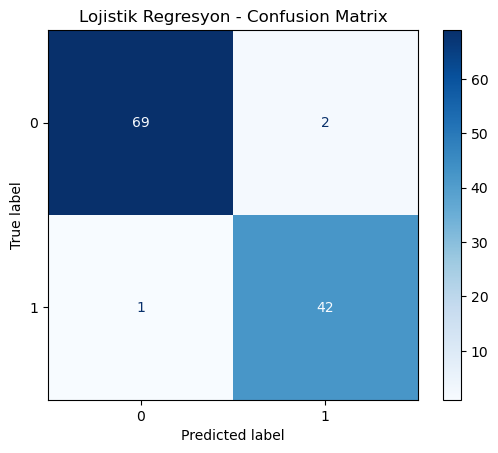

In [13]:
# 12. Confusion Matrix görselleştir
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Lojistik Regresyon - Confusion Matrix")
plt.show()